# Question 1

Consider estimating the mean of a standard Cauchy distribution using importance sampling with a normal proposal distribution. Does the estimator have finite variance?

## Solution

Cauchy distribution doesn't have a finite mean, i.e. a non-existing mean.
It's estimator will blow up as well.
$$
\theta = E_c[X] = \int_{-\infty}^{\infty} x \cdot \frac{1}{\pi(1+x^2)} dx
$$
$$
\hspace{80pt} = \int_{-\infty}^{\infty} x \cdot \frac{\sqrt{2}e^{x^2/2}}{\sqrt{\pi}(1+x^2)} \frac{e^{-x^2/2}}{\sqrt{2\pi}} dx
$$
$$
\hspace{120pt} = E_n \left[X \cdot \frac{\sqrt{2}e^{X^2/2}}{\sqrt{\pi}(1+X^2)}\right] \hspace{5pt} \vert \hspace{5pt} X \sim \mathbb{N}(0,1)
$$
$$
\hspace{70pt} \sim \frac{1}{N} \sum_{i=1}^{N} x \cdot \frac{\sqrt{2}e^{x^2/2}}{\sqrt{\pi}(1+x^2)} = \hat{\theta}_n
$$

Now, Variance of $\hat{\theta}_n$ as $n\rightarrow\infty$,  
$$
Var[\hat{\theta}_n] = Var_n\left(\frac{1}{N} \sum_{i=1}^{N} X \cdot \frac{C(X)}{N(X)}\right)
$$
$$
\hspace{15pt} = \frac{1}{N} Var_n\left(X \cdot \frac{\sqrt{2}e^{X^2/2}}{\sqrt{\pi}(1+X^2)} \right)
$$
$$
\hspace{125pt} = \frac{1}{N} \left[ E_n\left(X^2 \cdot (\frac{\sqrt{2}e^{X^2/2}}{\sqrt{\pi}(1+X^2)})^2 \right) - E_n^2 \left(X \cdot \frac{\sqrt{2}e^{X^2/2}}{\sqrt{\pi}(1+X^2)} \right) \right]
$$
$$
\hspace{75pt} = \frac{1}{N} \left[ E_n\left((\sqrt{\frac{2}{\pi}}\frac{Xe^{X^2/2}}{(1+X^2)})^2 \right) - E_n^2 \left(\sqrt{\frac{2}{\pi}}\frac{Xe^{X^2/2}}{(1+X^2)} \right) \right]
$$

Note the second term. It results in the integral:
$$
\int_{-\infty_1}^{\infty_2} \frac{x}{\pi(1+x^2)} dx
$$
which is undefined. Also the first term would yield an integral:
$$
\int_{-\infty_1}^{\infty_2} \frac{\sqrt{2}}{\pi\sqrt{\pi}}\frac{x^2 e^{x^2/2}}{(1+x^2)^2} dx
$$
which blows up. Therefore Variance of this estimator doesn't exist.

# Question 2

Considering a target density $f(x)$ and an importance proposal $g(x)$. Suppose

$$\sup_x \frac{f(x)}{g(x)} < \infty$$

- Then we know that the simple importance estimator has a finite variance. Does the weighted importance estimator also have finite variance?
- To estimate the mean of the target density, is there any benefit to using importance sampling over accept-reject sampling?

## Solution

- Given $Var_g(X) < \infty$. From [W5L13](https://dvats.github.io/assets/course/mth511/notes/W5L13_notes.pdf#page=3), $Var_g(\hat\theta_w)$ will be finite only when $\frac{Var_g(w(Z))}{(E_g(w(Z)))^2}$ is finite.  
Here $w(Z)$ is the ratio $\frac{\pi(Z)}{g(Z)}$, where $Z$ is proposed from $g(x)$.
We are talking about $Var_g$ and $E_g$ because they are finite themselves. Thus using $Var(X) = E(X^2) - (E(X))^2$, $\frac{Var_g(w(Z))}{(E_g(w(Z)))^2}$ is $\frac{E_g(w(Z))}{(E_g(w(Z)))^2} - 1$
This ratio can be blow up whenever $E_g(w(Z))$ is 0.

- For estimating mean of a target distribution, we can use a-r by first sampling from proposal, which if accepted, would then be used to calculate the mean. Probability of getting accepted is $$\frac{1}{\sup_{X} \frac{f(X)}{g(X)}} \hspace{5pt}\vert\hspace{5pt} X \sim g(x)$$
On the other hand, in importance sampling, we sample from proposal distribution, weight it, and directly use it to calculate mean. The intermediate step of getting accepted is no longer present.

# Question 3

For some known $y_i \in \mathbb{R}$, $i=1,2,\cdots,n$ and some $\nu>2$, suppose the target density is
$$
\pi(x) \propto e^{-x^2/2} \cdot {\displaystyle\prod_{i=1}^n} \left(1 + \frac{(y_i - x)^2}{\nu}\right)^{-(\nu + 1)/2}
$$
To generate y's use the following specifications:

- Set the seed as 1
- $n = 50$
- $\nu = 5$
- Use the Distributions package to randomly sample n values from a t-distribution with $\nu$ degrees of freedom. The sampled vector is y.

Implement an importance sampling estimator with a $\mathbb{N}(0, 1)$ proposal to estimate the first moment of this distribution. Does the weighted importance sampling estimator have finite variance? What happens if $\nu = 1$ and $\nu = 2$?

## Solution

We know the distribution $\pi(x)$ till a proportionality constant, for $\nu = 5$
$$
\pi(x) \propto e^{-x^2/2} \cdot {\displaystyle\prod_{i=1}^{50}} \left(1 + \frac{(y_i - x)^2}{5}\right)^{-3}
$$

In [1]:
using Random, Distributions
using Plots, Statistics
using JLD
Random.seed!(1);

In [46]:
function prod(k, y)
    prod_ = 1
    for i=1:length(y)
        prod_ *= (1 + (y[i] - k)^2 / v)^(-(v+1)/2)
    end
    return prod_
end;

#=
A small optimization used of cutting out e^(-x^2/2)
=#
function pi_tilde(x, y)
    if typeof(x) <: Number
        # return exp(-x^2/2) * prod(x, y)
        return prod(x, y)
    else
        # return map(k -> exp(-k^2/2) * prod(k, y), x)
        return map(k -> prod(k, y), x)
    end
end;

function normal(x)
    if typeof(x) <: Number
        # return exp(-x^2/2) * 1/sqrt(2π)
        # return 1/sqrt(2π) # we can even remove this constant
        return 1 # returning 1!
    else
        # return map(k -> exp(-k^2/2) * 1/sqrt(2π), x)
        # return map(k -> 1/sqrt(2π), x)
        return map(k -> 1, x)
    end
end;

In [47]:
function estimator_estimate_as_n_increases(v, n, N)
    t_stud = TDist(v);
    y = rand(t_stud, n);
    norm = Normal(); # sampling and proposal distribution
    theta_hats = zeros(N);
    for i=1:N
        #= 
        at each i, this samples i from proposal g(x), and estimates the estimator (mean/first moment) from weighted importance sampling method.
        Each step gives an estimate of the estimator (yeah, I like saying that) for i many samples
        =#
        x = rand(norm, i);
        theta_hat = sum(x .* pi_tilde(x, y) ./ normal(x)) / sum(pi_tilde(x, y) ./ normal(x))
        theta_hats[i] = theta_hat
        if mod(i, 100) == 0
            print(i, " ")
            saved_arr = theta_hats
        end
    end
    save("data.jld", "theta_hats", theta_hats)
    return theta_hats
end;

In [42]:
v = 5;
n = 50; # fixed
N = 1000;

100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

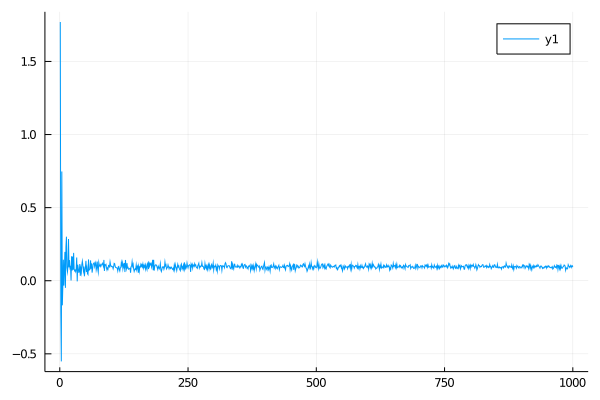

In [38]:
theta_hats = estimator_estimate_as_n_increases(v, n, N)
plot(1:N, theta_hats)

100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 

1200 

1300 

1400 

1500 

1600 

1700 

1800 

1900 

2000 

2100 

2200 

2300 

2400 

2500 

2600 

2700 

2800 

2900 

3000 

3100 

3200 

3300 

3400 

3500 

3600 

3700 

3800 

3900 

4000 

4100 

4200 

4300 

4400 

4500 

4600 

4700 

4800 

4900 

5000 

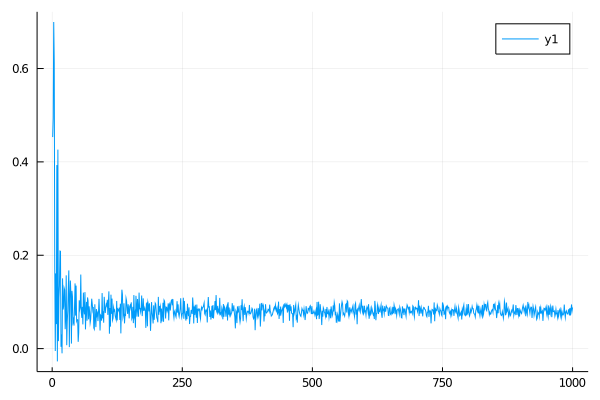

In [43]:
files = readdir(".")
if "data.jld" in files
    theta_hats = load("data.jld", "theta_hats"); # saved the one till 5000 samples
else
    theta_hats = estimator_estimate_as_n_increases(v, n, 5000)
end
plot(1:N, theta_hats[1:N])

In [50]:
function mean_var_at_n_sampled_estimator(v, n, norm_samples)
    n_ = 100
    samples = zeros(n_)

    t_stud = TDist(v);
    y = rand(t_stud, n);
    norm = Normal(); # sampling and proposal distribution

    for i=1:n_
        x = rand(norm, norm_samples);
        theta_hat = sum(x .* pi_tilde(x, y) ./ normal(x)) ./ sum(pi_tilde(x, y) ./ normal(x))
        samples[i] = theta_hat
    end
    println("Mean of $(n_) samples of estimator calculated from $(norm_samples) samples of norm : ", mean(samples))
    println("Variance of $(n_) samples of estimator calculated from $(norm_samples) samples of norm : ", var(samples))
end

mean_var_at_n_sampled_estimator (generic function with 1 method)

In [52]:
v = 5
mean_var_at_n_sampled_estimator(v, n, 5000)

Mean of 100 samples of estimator calculated from 5000 samples of norm : -0.16981137194842044
Variance of 100 samples of estimator calculated from 5000 samples of norm : 1.1087693052006152e-5


100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

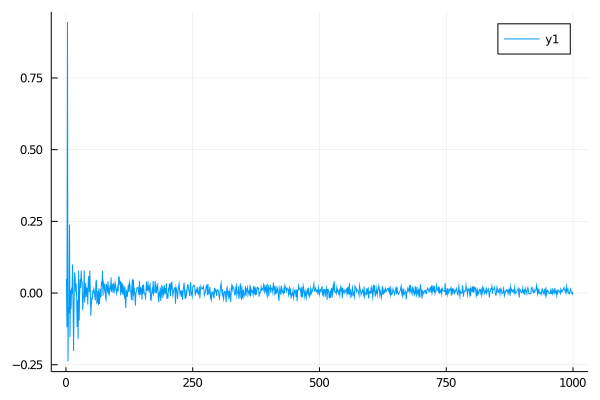

In [49]:
v = 2
N = 1000
theta_hats = estimator_estimate_as_n_increases(v, n, 1000)
plot(1:N, theta_hats[1:N])

In [53]:
v = 2
mean_var_at_n_sampled_estimator(v, n, 5000)

Mean of 100 samples of estimator calculated from 5000 samples of norm : 0.08508842933856493
Variance of 100 samples of estimator calculated from 5000 samples of norm : 1.4508304148675252e-5


100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

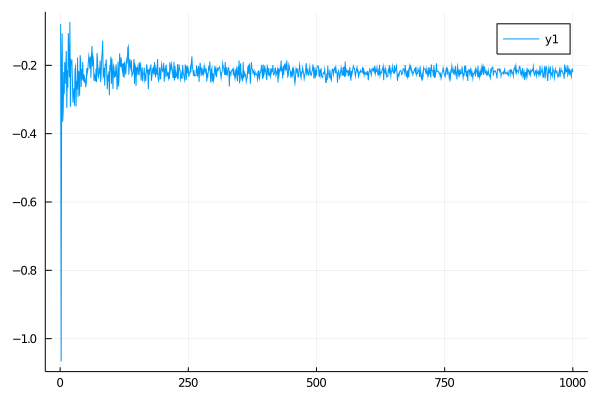

In [55]:
v = 1
N = 1000
theta_hats = estimator_estimate_as_n_increases(v, n, 1000)
plot(1:N, theta_hats[1:N])

In [54]:
v = 1
mean_var_at_n_sampled_estimator(v, n, 5000)

Mean of 100 samples of estimator calculated from 5000 samples of norm : -0.08685390800939428
Variance of 100 samples of estimator calculated from 5000 samples of norm : 1.3327455803641475e-5


Clearly, the weighted importance sampling method yields a finite variance.  
Changing $\nu$ doesn't yield much difference, except maybe the bias changes ($\nu$ odd gives negative bias while $\nu$ even gives positive)  
The last statement isn't proved, but just an observation

# Question 4

Suppose $Y_{1}, Y_{2}, \cdots, Y_n \hspace{2pt}\vert \hspace{2pt} \lambda \sim Poisson(\lambda)$  
The prior $\lambda \sim Gamma(\alpha, \beta)$ where $\alpha, \beta$ are known. What is the posterior distribution of $\lambda$?

## Solution

By Bayes theorem, we update our beliefs.  
We had the belief that $\lambda \sim Gamma(\alpha, \beta)$, i.e. sampled from it.  
Then we obtained i.i.d. samples $Y = Y_{1}, Y_{2}, \cdots, Y_n$ from a distribution $Poisson(\lambda)$.  
Now we want to update what $\lambda$ would be given we drew these samples assuming what $\lambda$ was!
$$
P(\lambda \vert Y) = \frac{P(Y \vert \lambda) \cdot P(\lambda)}{P(Y)} \\
\propto P(Y \vert \lambda) \cdot P(\lambda)
\propto \frac{\lambda^{Y_1}e^{-\lambda}}{Y_1!} \frac{\lambda^{Y_2}e^{-\lambda}}{Y_2!} \cdots \frac{\lambda^{Y_2}e^{-\lambda}}{Y_2!} \cdot \frac{\lambda^{\alpha-1} e^{-\lambda/\beta}}{\beta^\alpha \Gamma(\alpha)} \\
\propto \lambda^{(Y_1 + Y_2 + \cdots + Y_n + \alpha - 1)} e^{-\lambda (n + \frac{1}{\beta})} \\
\propto \lambda^{\Theta - 1} e^\frac{-\lambda}{\Phi}
\propto Gamma(\Theta, \Phi)
$$

$$

$$